# THE SPARKS FOUNDATION - GRIPAUGUST21

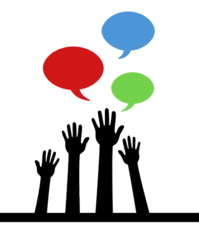

# TASK 3 - PREDICTION USING UNSUPERVISED ML

# AUTHOR - ANIRUDH GUPTA

## ALL THE PREREQUISITES

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Now we will load our dataset
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Since we have to perform the clustering task, we will leave out Species column
df.drop(columns = ["Species"], inplace= True)

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


## OVERALL STUDY OF THE DATA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### We see here that data type of all the variables is correct and there are no null values

In [9]:
# Here we also see that we do not require Id column for our clustering task, so we will drop it
df.drop(columns = ["Id"], inplace= True)

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### We see that there is nothing that requires our attention in above table

## CHECKING FOR THE BLANK SPACES

In [11]:
for i in df.select_dtypes("float64").columns:
    bs = df[i].astype("str").str.isspace().sum()
    print(i, bs)

SepalLengthCm 0
SepalWidthCm 0
PetalLengthCm 0
PetalWidthCm 0


#### Thus we see that there are no blank spaces in our dataset

## FINDING OUT THE OPTIMUM NUMBER OF CLUSTERS USING ELBOW METHOD AND K MEANS CLUSTERING

In [12]:
from sklearn.cluster import KMeans

In [13]:
WCSS = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i, init="random", random_state=25)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)
    

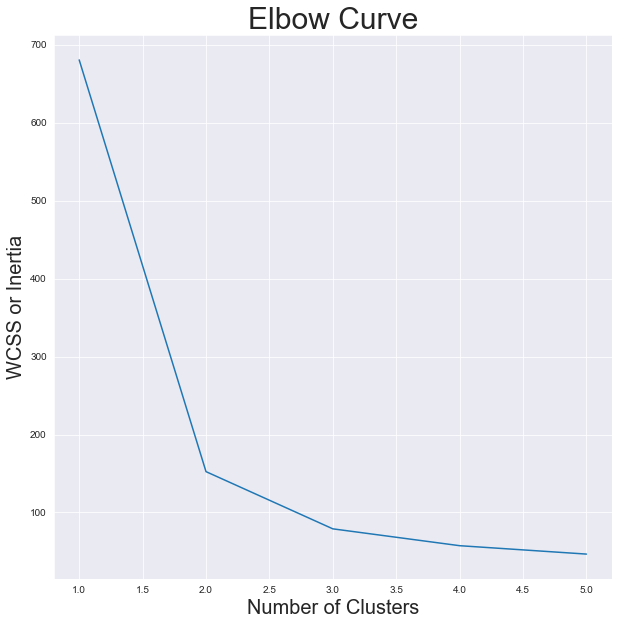

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,10))
plt.plot(range(1,6), WCSS)
plt.title("Elbow Curve", fontsize = 30)
plt.ylabel("WCSS or Inertia", fontsize=20)
plt.xlabel("Number of Clusters", fontsize=20)
plt.show()

#### We see that we are achieving elbow at 2 this means that optimum number of clusters are 2

## CREATING THE KMEANS MODEL, FITTING IT ON THE DATASET AND PREDICTING THE CLUSTERS

In [18]:
# Creating the KMeans model
kmeans1 = KMeans(n_clusters=2, random_state=25)

In [19]:
# Fitting the Kmeans model onto the dataset
kmeans1.fit(df)

KMeans(n_clusters=2, random_state=25)

In [20]:
# Predicting the clusters
clusters = kmeans1.predict(df)

In [21]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
df["Clusters"] = pd.DataFrame(data= clusters)

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## VISUALIZING THE CLUSTERS

In [ ]:
# We here know that we have 4 independent variables in our dataset but we can only represent two on a graph 

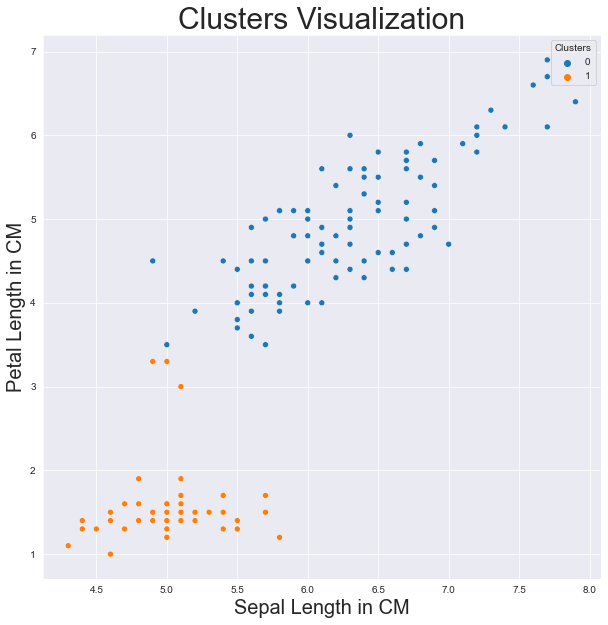

In [35]:
plt.figure(figsize= (10,10))
sns.scatterplot(x=df["SepalLengthCm"], y= df["PetalLengthCm"], hue = df["Clusters"])
plt.title("Clusters Visualization", fontsize= 30)
plt.xlabel("Sepal Length in CM", fontsize = 20)
plt.ylabel("Petal Length in CM", fontsize = 20)
plt.show()